In [1]:
from ads_tools import Ads
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_context('paper')

In [2]:
flats_sale = Ads('flat_sale')

In [3]:
flats_sale.filter_and_transform_to_df(min_price = 30000.00, max_price=5000000.0,size_limit=300.0)

Dataset transfromed to a DataFrame and formatted
NA values removed from columns: 'price', 'date'


In [4]:
print(flats_sale)

Ads dataset class. Number of observations: 147691, Number of variables: 13


In [5]:
dataset = flats_sale.filtered_data

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147691 entries, 1001294070520910468328209 to 1002175701010911083859109
Data columns (total 13 columns):
adress          147471 non-null object
price           147691 non-null float64
date            147691 non-null datetime64[ns]
n_rooms         147268 non-null float64
n_bath          58533 non-null float64
location        147691 non-null object
advertiser      146499 non-null object
desc            147691 non-null object
parking         48882 non-null object
type            147691 non-null object
street_regex    64467 non-null object
size_m2         147691 non-null float64
url             147691 non-null object
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 15.8+ MB


In [7]:
dataset.head(2)

,adress,price,date,n_rooms,n_bath,location,advertiser,desc,parking,type,street_regex,size_m2,url
1001294070520910468328209,Wrzeciono,305000.0,2017-09-06,2.0,NaN,Bielany,agency,BIELANY – ładny rozkład mieszkania – 2pok – 47...,None,Mieszkanie,None,47.0,https://www.gumtree.pl/a-mieszkania-i-domy-spr...
1001294070590910468328209,Josepha Conrada,390000.0,2017-09-26,3.0,NaN,Bielany,agency,Bielany – 3 pokoje 60m – po remoncie do wejści...,None,Mieszkanie,None,60.0,https://www.gumtree.pl/a-mieszkania-i-domy-spr...


In [8]:
dataset.reset_index(inplace=True)

In [9]:
cols = ['price','advertiser','n_rooms','n_bath','location','size_m2','parking']
dataset = dataset[cols]

In [10]:
dataset.head()

,price,advertiser,n_rooms,n_bath,location,size_m2,parking
0,305000.0,agency,2.0,NaN,Bielany,47.0,None
1,390000.0,agency,3.0,NaN,Bielany,60.0,None
2,397000.0,agency,3.0,NaN,Mokotow,54.0,None
3,341000.0,agency,3.0,NaN,Bielany,51.0,None
4,283000.0,agency,2.0,NaN,Bielany,35.0,None


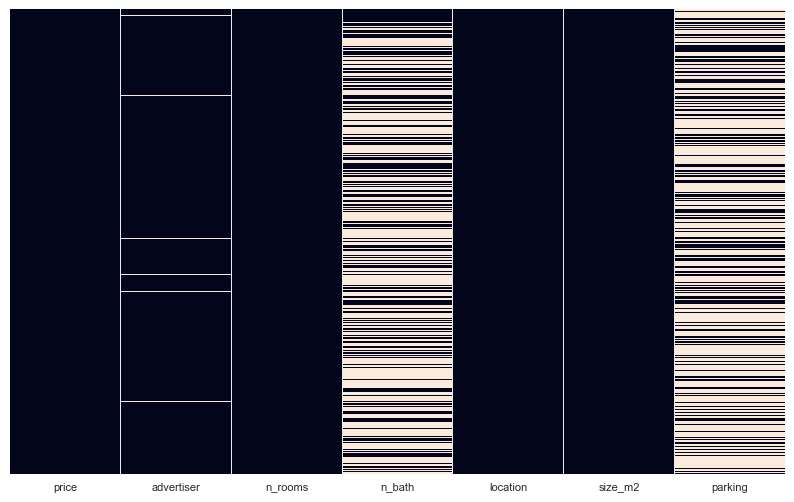

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False)
plt.show()

In [12]:
values = {'n_bath': 1.0, 'parking': 'no'}
dataset = dataset.fillna(value=values)

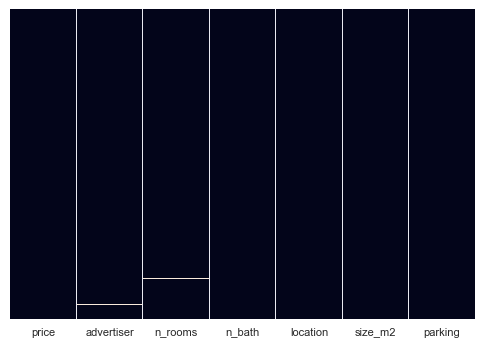

In [13]:
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False)
plt.show()

In [14]:
dataset.dropna(inplace=True)

Change price units to thousand PLN and calculate price per square meter

In [15]:
dataset['price'] = dataset['price']/1000.0
dataset['price_m2'] = dataset['price']/dataset['size_m2']

In [16]:
dataset.head(2)

,price,advertiser,n_rooms,n_bath,location,size_m2,parking,price_m2
0,305.0,agency,2.0,1.0,Bielany,47.0,no,6.489362
1,390.0,agency,3.0,1.0,Bielany,60.0,no,6.500000


Remove ads with price per square meter higher than PLN 25k

In [17]:
dataset = dataset[dataset['price_m2']<25.0]

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145813 entries, 0 to 147690
Data columns (total 8 columns):
price         145813 non-null float64
advertiser    145813 non-null object
n_rooms       145813 non-null float64
n_bath        145813 non-null float64
location      145813 non-null object
size_m2       145813 non-null float64
parking       145813 non-null object
price_m2      145813 non-null float64
dtypes: float64(5), object(3)
memory usage: 10.0+ MB


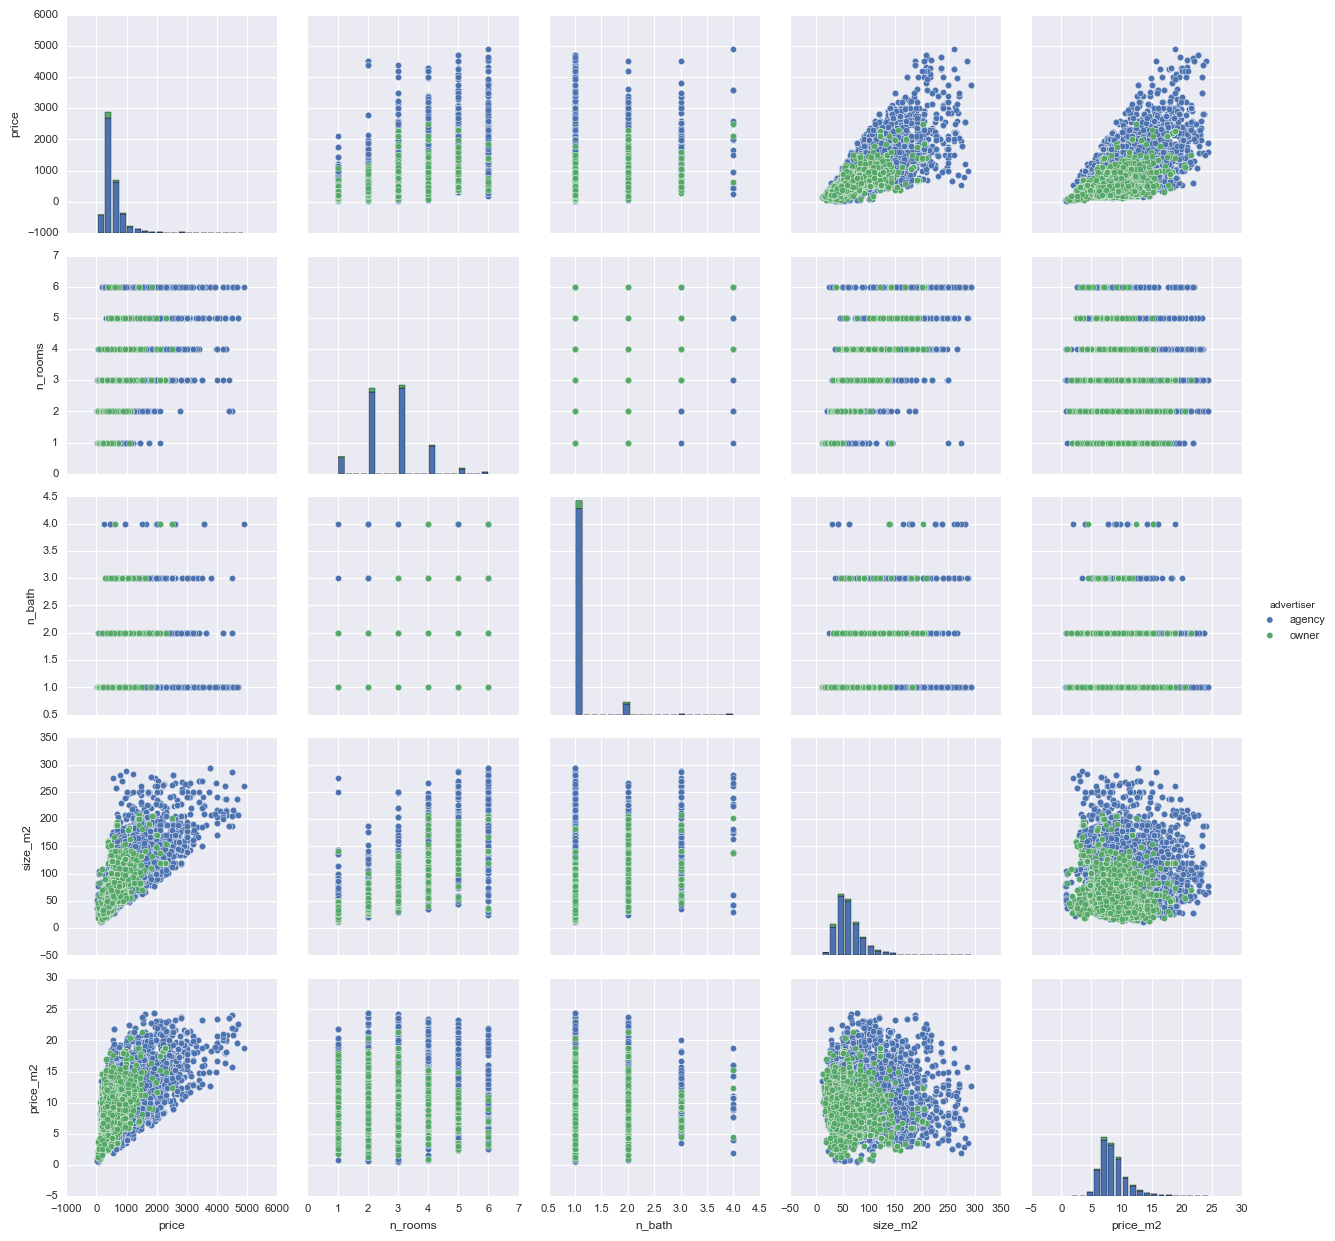

In [19]:
sns.pairplot(dataset,hue='advertiser', diag_kws=dict(bins=20))
plt.show()

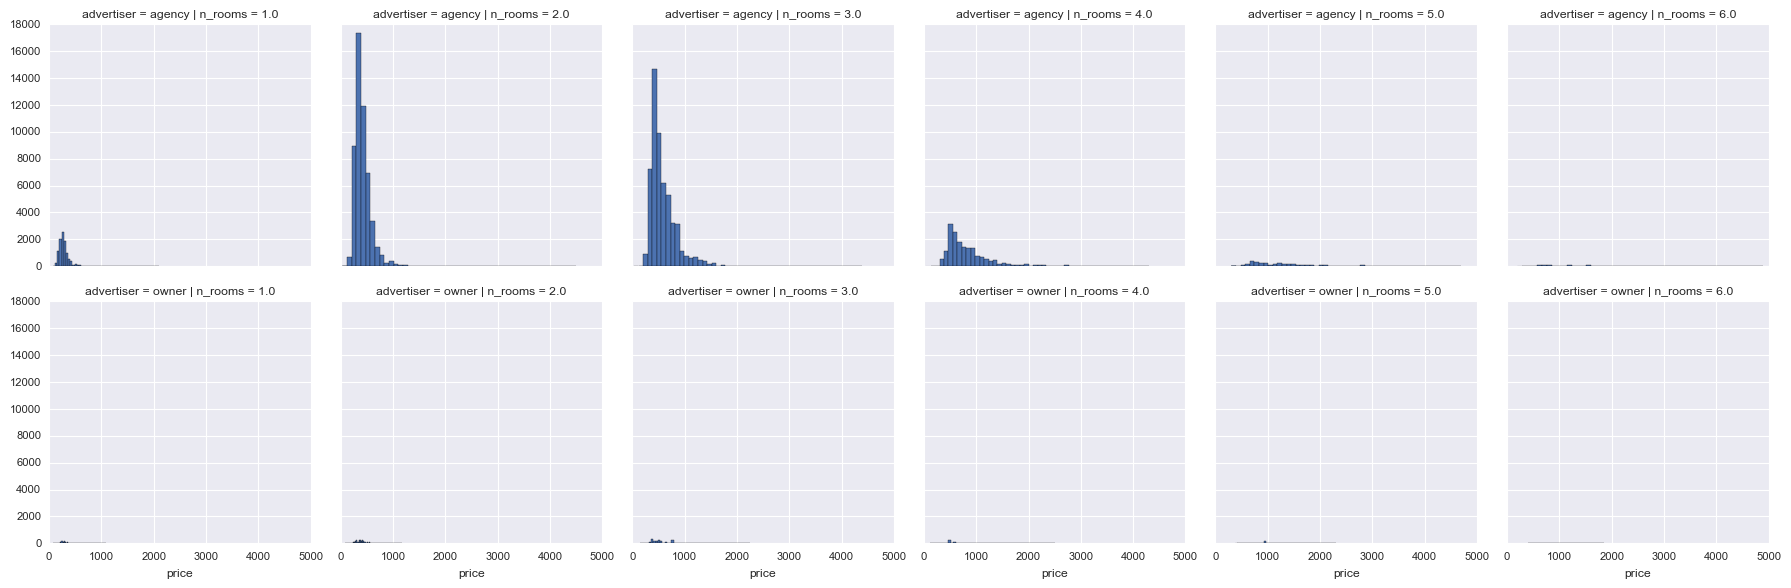

In [20]:
g = sns.FacetGrid(dataset,col='n_rooms',row='advertiser')
g.map(plt.hist,'price',bins=50)

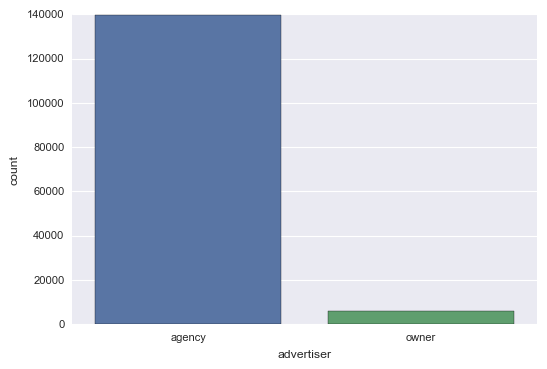

In [21]:
sns.countplot(dataset['advertiser'])

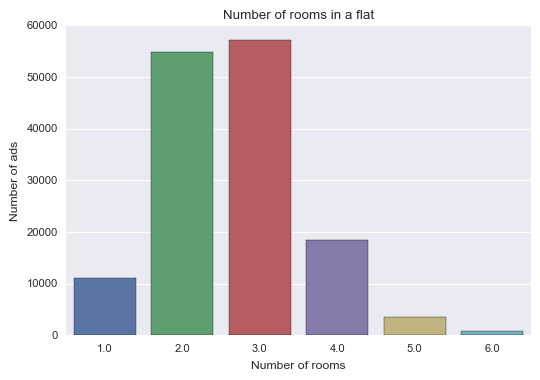

In [22]:
ax = sns.countplot(x='n_rooms',data=dataset)
ax.set(xlabel='Number of rooms', ylabel='Number of ads', title='Number of rooms in a flat')
plt.show()

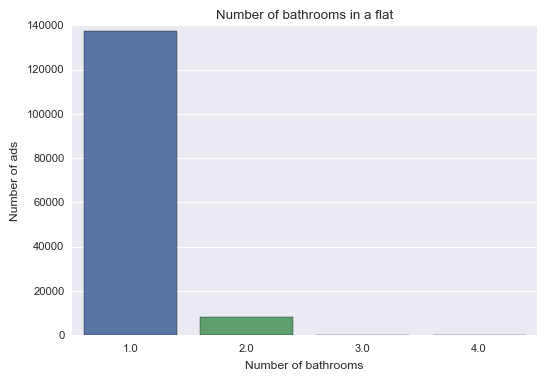

In [23]:
ax = sns.countplot(x='n_bath',data=dataset)
ax.set(xlabel='Number of bathrooms', ylabel='Number of ads', title='Number of bathrooms in a flat')
plt.show()

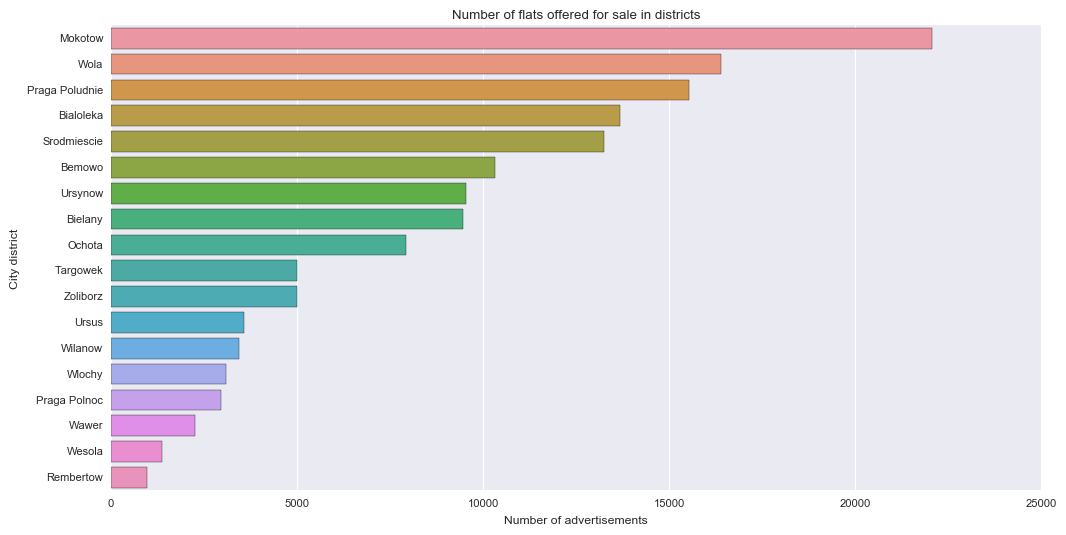

In [24]:
plt.figure(figsize=(12,6))
ranks = dataset.groupby('location')['price_m2'].count().sort_values()[::-1].index
ax = sns.countplot(y='location',data=dataset,order=ranks)
ax.set(xlabel='Number of advertisements', ylabel='City district', title='Number of flats offered for sale in districts')
plt.show()

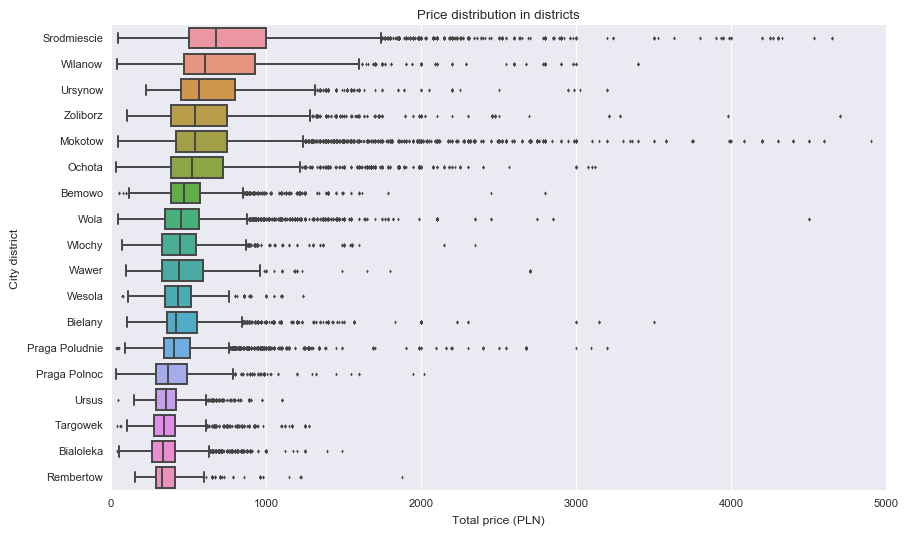

In [25]:
plt.figure(figsize=(10,6))
ranks = dataset.groupby('location')['price'].median().sort_values()[::-1].index
ax = sns.boxplot(data=dataset, y='location',x='price',fliersize=2,order=ranks)
ax.set(xlabel='Total price (PLN)', ylabel='City district', title='Price distribution in districts')
plt.show()

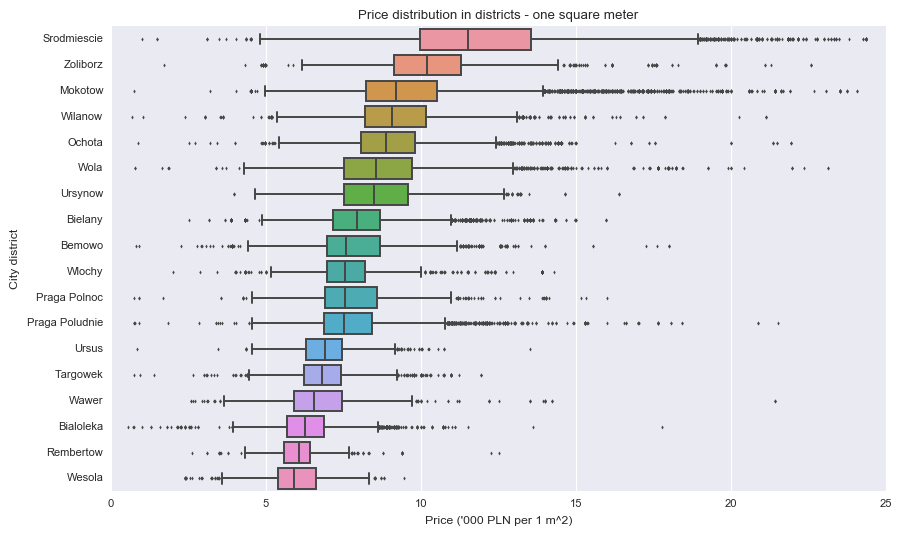

In [26]:
plt.figure(figsize=(10,6))
ranks = dataset.groupby('location')['price_m2'].median().sort_values()[::-1].index
ax = sns.boxplot(data=dataset, y='location',x='price_m2',fliersize=2, order=ranks)
ax.set(xlabel="Price ('000 PLN per 1 m^2)", ylabel='City district', 
       title='Price distribution in districts - one square meter')
plt.show()

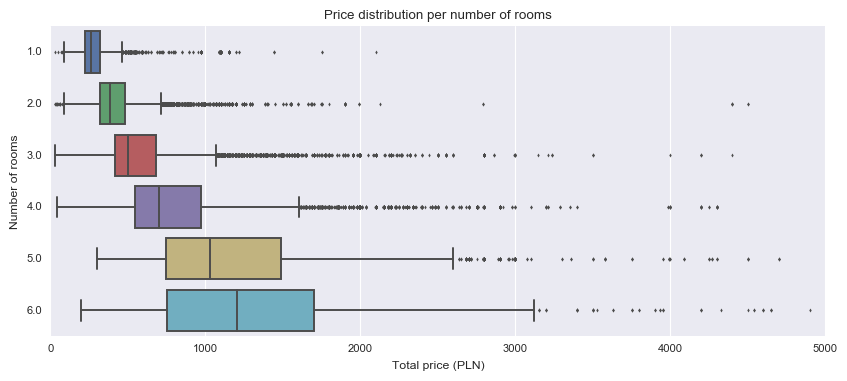

In [27]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(data=dataset, y='n_rooms',x='price',fliersize=2,orient='h')
ax.set(xlabel='Total price (PLN)', ylabel='Number of rooms', title='Price distribution per number of rooms')
plt.show()

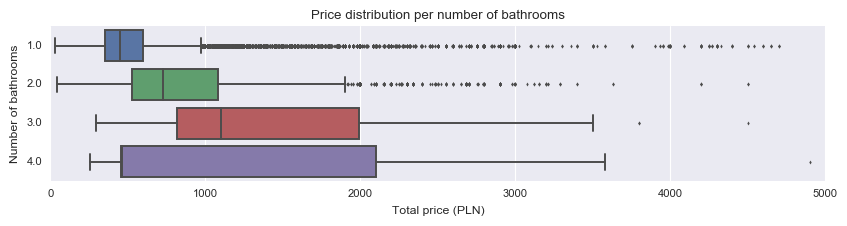

In [28]:
plt.figure(figsize=(10,2))
ax = sns.boxplot(data=dataset, y='n_bath',x='price',fliersize=2,orient='h')
ax.set(xlabel='Total price (PLN)', ylabel='Number of bathrooms', title='Price distribution per number of bathrooms')
plt.show()

# Two-room apartments analysis

In [29]:
two_room = dataset[(dataset['n_rooms']==2.0) & (dataset['price']<1200.00)]

In [30]:
two_room.describe()

,price,n_rooms,n_bath,size_m2,price_m2
count,54716.000000,54716.0,54716.000000,54716.000000,54716.000000
mean,416.813721,2.0,1.007914,47.792437,8.700536
std,141.018951,0.0,0.104855,9.670087,2.132808
min,32.900000,2.0,1.000000,21.000000,0.692308
25%,322.000000,2.0,1.000000,41.000000,7.204361
50%,385.000000,2.0,1.000000,47.000000,8.386364
75%,480.000000,2.0,1.000000,53.000000,9.772727
max,1199.900000,2.0,4.000000,134.000000,22.416667


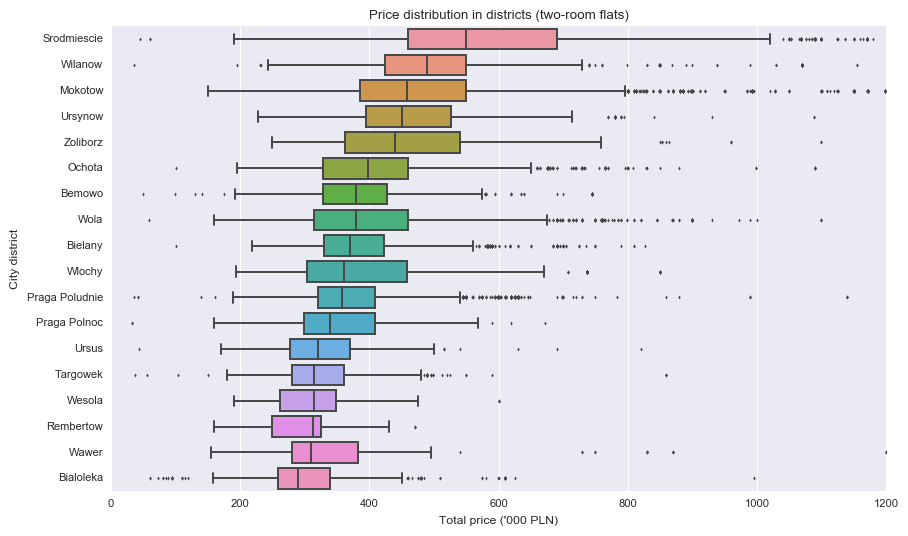

In [31]:
plt.figure(figsize=(10,6))
ranks = two_room.groupby('location')['price'].median().sort_values()[::-1].index
ax = sns.boxplot(data=two_room, y='location',x='price',fliersize=2,order=ranks)
ax.set(xlabel="Total price ('000 PLN)", ylabel='City district', title='Price distribution in districts (two-room flats)')
plt.show()

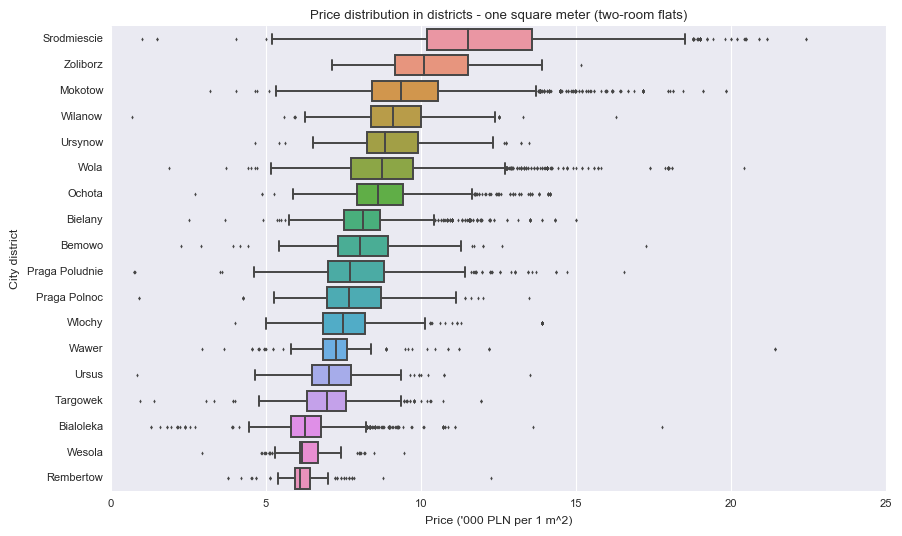

In [32]:
plt.figure(figsize=(10,6))
ranks = two_room.groupby('location')['price_m2'].median().sort_values()[::-1].index
ax = sns.boxplot(data=two_room, y='location',x='price_m2',fliersize=2, order=ranks)
ax.set(xlabel="Price ('000 PLN per 1 m^2)", ylabel='City district', 
       title='Price distribution in districts - one square meter (two-room flats)')
plt.show()

# Three-room apartments analysis

In [33]:
three_room = dataset[(dataset['n_rooms']==3.0) & (dataset['price']<1500.00)]

In [34]:
three_room.describe()

,price,n_rooms,n_bath,size_m2,price_m2
count,56437.000000,56437.0,56437.000000,56437.000000,56437.000000
mean,567.584439,3.0,1.065223,67.579230,8.302001
std,218.048275,0.0,0.250059,15.448981,2.033147
min,32.500000,3.0,1.000000,29.000000,0.532468
25%,415.000000,3.0,1.000000,57.000000,6.944306
50%,499.000000,3.0,1.000000,65.000000,7.888889
75%,669.900000,3.0,1.000000,76.000000,9.349593
max,1499.000000,3.0,4.000000,250.000000,21.949153


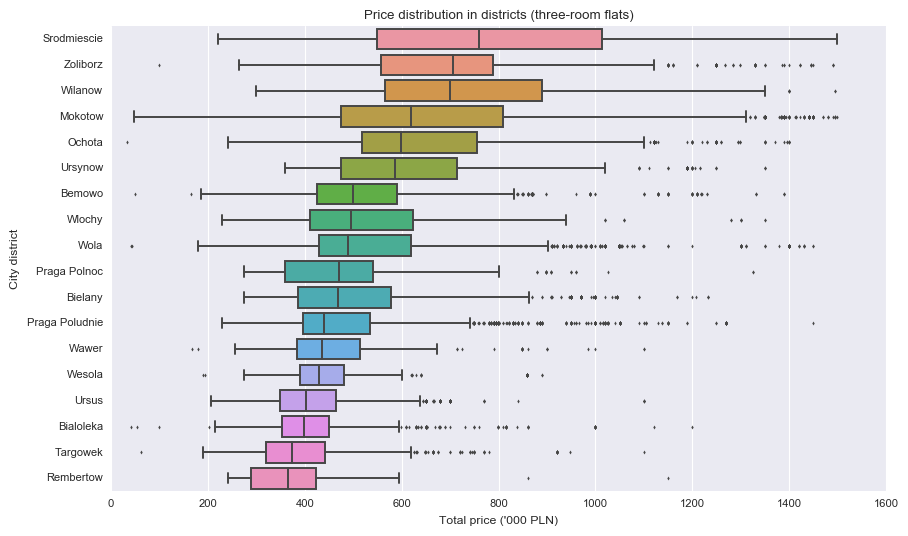

In [35]:
plt.figure(figsize=(10,6))
ranks = three_room.groupby('location')['price'].median().sort_values()[::-1].index
ax = sns.boxplot(data=three_room, y='location',x='price',fliersize=2,order=ranks)
ax.set(xlabel="Total price ('000 PLN)", ylabel='City district', title='Price distribution in districts (three-room flats)')
plt.show()

## Linear regression model

In [36]:
district_data = dataset[dataset['location'] == 'Mokotow']

In [37]:
district_data = district_data[['price','n_rooms','size_m2','parking','n_bath']]

In [38]:
district_data.corr()

,price,n_rooms,size_m2,n_bath
price,1.000000,0.573531,0.857453,0.237028
n_rooms,0.573531,1.000000,0.750533,0.266472
size_m2,0.857453,0.750533,1.000000,0.294032
n_bath,0.237028,0.266472,0.294032,1.000000


In [39]:
parking = pd.get_dummies(district_data['parking'],prefix='parking')
model_dataset = pd.concat([district_data,parking],axis=1)
model_dataset.drop(['parking','parking_no'],axis=1,inplace=True)
model_dataset.describe()

,price,n_rooms,size_m2,n_bath,parking_basement,parking_garage,parking_street
count,22068.000000,22068.000000,22068.000000,22068.00000,22068.000000,22068.000000,22068.000000
mean,659.015310,2.646094,66.506661,1.06634,0.059135,0.072005,0.186378
std,433.182815,0.863451,29.505388,0.27517,0.235883,0.258502,0.389421
min,47.000000,1.000000,13.000000,1.00000,0.000000,0.000000,0.000000
25%,418.000000,2.000000,47.000000,1.00000,0.000000,0.000000,0.000000
50%,539.000000,3.000000,59.000000,1.00000,0.000000,0.000000,0.000000
75%,750.000000,3.000000,79.000000,1.00000,0.000000,0.000000,0.000000
max,4900.000000,6.000000,294.000000,4.00000,1.000000,1.000000,1.000000


In [40]:
X = model_dataset.drop('price',axis=1)
y = model_dataset['price']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
coeffs = pd.DataFrame(data=lm.coef_,index=X.columns, columns=['Coefficient'])
coeffs.sort_values(by='Coefficient',inplace=True)

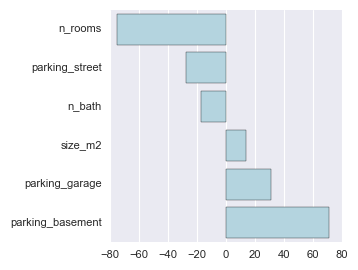

In [44]:
plt.figure(figsize=(3,3))
sns.barplot(data=coeffs.transpose(),orient='h',color='lightblue')
plt.show()

In [45]:
pred = lm.predict(X_test)

In [46]:
lm.score(X_test,y_test)

0.74883043104302693

## Models for all districts

In [47]:
districts = list(dataset['location'].unique())

In [48]:
districts

['Bielany',
 'Mokotow',
 'Zoliborz',
 'Bemowo',
 'Praga Poludnie',
 'Ochota',
 'Wawer',
 'Bialoleka',
 'Praga Polnoc',
 'Wilanow',
 'Srodmiescie',
 'Ursynow',
 'Wola',
 'Ursus',
 'Targowek',
 'Wesola',
 'Wlochy',
 'Rembertow']

In [49]:
r2_dict = dict()
model_dict = dict()

In [50]:
for district in districts:
    district_data = dataset[dataset['location'] == district]
    district_data = district_data[['price','n_rooms','size_m2','parking','n_bath']]
    parking = pd.get_dummies(district_data['parking'],prefix='parking')
    model_dataset = pd.concat([district_data,parking],axis=1)
    model_dataset.drop(['parking','parking_no'],axis=1,inplace=True)
    X = model_dataset.drop('price',axis=1)
    y = model_dataset['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    coeffs = pd.DataFrame(data=lm.coef_,index=X.columns, columns=['Coefficient'])
    coeffs.sort_values(by='Coefficient',inplace=True)
    r2_dict[district] = lm.score(X_test,y_test)
    model_dict[district] = coeffs

In [51]:
r2 = pd.DataFrame(pd.Series(r2_dict),columns=['R^2 Score'])
r2.sort_values(by='R^2 Score',ascending=False)

,R^2 Score
Ochota,0.841337
Targowek,0.832717
Praga Polnoc,0.816831
Ursus,0.803417
Ursynow,0.802772
Zoliborz,0.800236
Bialoleka,0.796676
Wola,0.791804
Rembertow,0.754096
Mokotow,0.750855


In [52]:
regression_parameters = pd.DataFrame(pd.Series(model_dict))
regression_parameters.loc['Bemowo'][0]

,Coefficient
parking_street,-46.144203
n_rooms,-29.569739
parking_garage,4.506641
size_m2,8.005913
n_bath,24.599511
parking_basement,34.702804
